# Topics

## 1. Quick PCA review: The difference between 

### pca.fit() 
### pca.transform()
### pca.fit_transform()

## 2. Support Vector Machine (SVM)

## 3. SVM Applied to Handwritten Digit Recognition

## 4. The meaning of gamma

## SVC: Support Vector Classification
## In sklearn.svm.SVC() the default kernel is RBF
## For kernel parameters, see
## http://scikit-learn.org/stable/modules/svm.html#svm-classification

In [1]:
%matplotlib inline

''' Initial Imports'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ***use seaborn plotting style defaults
import seaborn as sns; sns.set()

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


#********************* KEY IMPORT OF THIS LECTURE********************************
from sklearn import svm


# loading handwritten digits
dig_data = load_digits()
X = dig_data.data
# y: the values of the digits, or "ground truth"
y = dig_data.target
dig_img = dig_data.images
print(type(X), X.dtype, X.shape)
print(type(dig_img), dig_img.dtype, dig_img.shape)
print(type(y), y.dtype, y.shape)


<class 'numpy.ndarray'> float64 (1797, 64)
<class 'numpy.ndarray'> float64 (1797, 8, 8)
<class 'numpy.ndarray'> int64 (1797,)


## Now let's explore the documentation for SVC 

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## and the attributes:

- ### support\_ : array-like, shape = [n\_SV]
Indices of support vectors.


- ### support\_vectors\_ : array-like, shape = [n_SV, n_features]
Support vectors.

- ### n\_support\_ : array-like, dtype=int32, shape = [n_class]
Number of support vectors for each class.

- ### dual\_coef\_ : array, shape = [n_class-1, n_SV]
dual\_coef\_ : array, shape = [n_class-1, n_SV]
Coefficients of the support vector in the decision function. For multiclass, coefficient for all 1-vs-1 classifiers. The layout of the coefficients in the multiclass case is somewhat non-trivial. See the section about multi-class classification in the SVM section of the User Guide for details.

    --> These can be converted to the Langrange multipliers (i.e., the weights; except here, with labels mixed in)
    
- ### intercept_ : array, shape = [n_class * (n_class-1) / 2]
Constants in decision function.  

    --> That is, the b! (I have thought much about the shape yet -- need to do that.)

## Applying SVM Handwritten Digit Recogntion 

## Parameters to specify:

- ### kernel: The default is 'rbf'.  For other kernels, see

    ### http://scikit-learn.org/stable/modules/svm.html#kernel-functions

- ###  Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to "regularize" the estimation: The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth (ignores noise), while a high C aims at classifying all training examples correctly (but maybe giving noise too much weight). [We will addres the issue of overfitting in Computational Physics II.]

- ### If data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.

- ### (Particular to RBF) gamma: it defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.


<class 'numpy.ndarray'> float64 (1797, 64)
<class 'numpy.ndarray'> int64 (1797,)
Xtrain.shape, ytrain.shape (1796, 64) (1796,)
Xtest.shape, ytest.shape (1, 64) ()
(1796, 10)
(1, 10)


array([2])

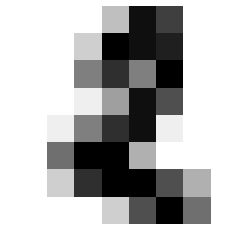

In [2]:
''' 
Now, we get the first "2" right!

The first "5" is still trouble, 
but even human can't necessarily tell that "5"!  

'''
dig_data = load_digits()
X = dig_data.data
y = dig_data.target
# This is basically each array in X
# getting reshaped into (8, 8).
dig_img = dig_data.images

print(type(X), X.dtype, X.shape)
print(type(y), y.dtype, y.shape)

select_idx = 2
# select_idx = 5

# ********************************Separating training data from testing data****************
Xtrain = np.delete(X, select_idx, axis = 0)
ytrain = np.delete(y, select_idx)

# if you don't do .reshape(1, -1), you get a warning.
# B/c the data argument for classifier has to be an array,
# even if it's a one-element array.
Xtest = X[select_idx].reshape(1, -1)
test_img = dig_img[select_idx]
ytest = y[select_idx]

print('Xtrain.shape, ytrain.shape', Xtrain.shape, ytrain.shape)
print('Xtest.shape, ytest.shape', Xtest.shape, ytest.shape)

plt.figure(figsize = (4, 4))
plt.imshow(test_img, cmap = 'binary')
plt.grid('off')
plt.axis('off')


# ************************************* The PCA Section ********************************
n_comp = 10

pca = PCA(n_comp)  

# finding pca axes
pca.fit(Xtrain)
# projecting training data onto pca axes
Xtrain_proj = pca.transform(Xtrain)
# projecting test data onto pca axes
Xtest_proj = pca.transform(Xtest)

print(Xtrain_proj.shape)
print(Xtest_proj.shape)


# ************************************* The SVM Section ********************************

# instantiating an SVM classifier
clf = svm.SVC(gamma=0.001, C=100.)

# apply SVM to training data and draw boundaries.
clf.fit(Xtrain_proj, ytrain)
# Use SVM-determined boundaries to make
# a prediction for the test data point.
clf.predict(Xtest_proj)


## Breakout:
## 1. Turn the above into a function
## classify_dig_svm(X, y, dig_img, select_idx, n_comp = 10, plot_test_img = False)
## where
- ### X: data
- ### y: targets (labels, or "ground truth")
- ### select_idx: the index of the test data point
- ### dig_img: 2D arrays of the digit image that corresponds to select_idx
- ### plot_test_img: plot the above image, if True.
- ### n_comp: how many PCA components to use
- ### returns the prediction

## 2. Test this function on select_idx = 0, 1, and 2.  One at a time.

## 3. Write a main program that does the "leave-one-out" test first for 50 images, just as we did in last class, 10 components; then move up to 20 components.  Compute the success rate in each case.

## 4. Do the "leave-one-out" test for 500 images for 10 and then 20 components.  Compute the success rate for each case (takes about 1 min).

## The success rates for all 1797 images with 20 (or 30) components are similar to 500 images.

In [16]:
def classify_dig_svm(X, y, dig_img, select_idx, n_comp = 10, plot_test_img = False):

#     print(type(X), X.dtype, X.shape)
#     print(type(y), y.dtype, y.shape)

    # ********************************Separating training data from testing data****************
    Xtrain = np.delete(X, select_idx, axis = 0)
    ytrain = np.delete(y, select_idx)

    # if you don't do .reshape(1, -1), you get a warning.
    # B/c the data argument for classifier has to be an array,
    # even if it's a one-element array.
    Xtest = X[select_idx].reshape(1, -1)
    test_img = dig_img[select_idx]
    ytest = y[select_idx]

#     print('Xtrain.shape, ytrain.shape', Xtrain.shape, ytrain.shape)
#     print('Xtest.shape, ytest.shape', Xtest.shape, ytest.shape)
    
    if (plot_test_img == True):
        plt.figure(figsize = (4, 4))
        plt.imshow(test_img, cmap = 'binary')
        plt.grid('off')
        plt.axis('off')


    # ************************************* The PCA Section ********************************

    pca = PCA(n_comp)  

    # finding pca axes
    pca.fit(Xtrain)
    # projecting training data onto pca axes
    Xtrain_proj = pca.transform(Xtrain)
    # projecting test data onto pca axes
    Xtest_proj = pca.transform(Xtest)

#     print(Xtrain_proj.shape)
#     print(Xtest_proj.shape)


    # ************************************* The SVM Section ********************************

    # instantiating an SVM classifier
    clf = svm.SVC(gamma=0.001, C=100.)

    # apply SVM to training data and draw boundaries.
    clf.fit(Xtrain_proj, ytrain)
    # Use SVM-determined boundaries to make
    # a prediction for the test data point.

    return clf.predict(Xtest_proj)

In [25]:
dig_data = load_digits()
X = dig_data.data
y = dig_data.target
dig_img = dig_data.images
digits = dig_data.target

num = 50
counter = 1

for i in range(num):
    prediction = classify_dig_svm(X, y, dig_img, i, n_comp = 10)
    if(prediction == digits[i]):
        counter += 1
rate = counter/num
print(rate)

0.98


# End of week 15-1